In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
dataset = sklearn.datasets.load_wine()

In [5]:
print(dataset)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [10]:
dataframe = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [14]:
dataframe['Price'] = dataset.target

In [16]:
dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Price
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [50]:
dataframe.feature_counts(['Price'])

AttributeError: 'DataFrame' object has no attribute 'feature_counts'

In [27]:

dataframe.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [24]:
dataframe.shape

(178, 14)

In [23]:
dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Price
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [28]:
correlation = dataframe.corr()

HEATMAP


<Axes: >

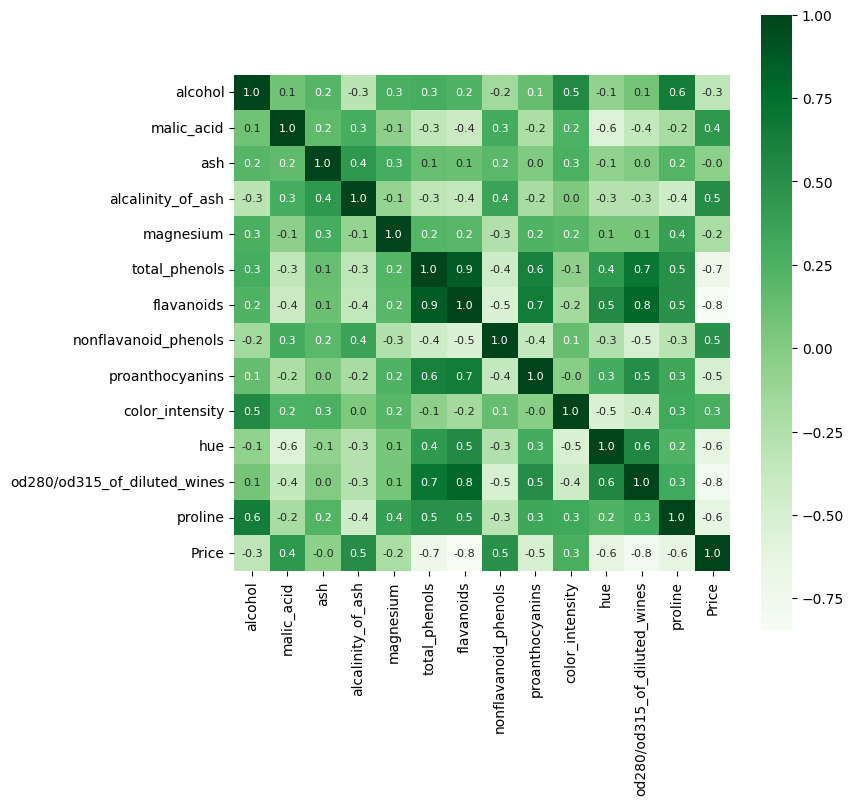

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [51]:
# Training and Testing data
X=dataframe.drop(columns = ['Price'],axis=1)
Y=dataframe['Price']

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [53]:
X.shape,X_train.shape,X_test.shape

((178, 13), (142, 13), (36, 13))

Model Training


In [54]:
model = XGBRegressor()

In [55]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction


In [58]:
training_prediction = model.predict(X_train)

In [60]:
print(training_prediction)

[1.9998689e+00 1.0000299e+00 1.0000877e+00 1.0002071e+00 1.9999911e+00
 1.9999540e+00 1.0000839e+00 4.3766539e-07 1.9998338e+00 1.0000877e+00
 9.9954236e-01 7.7678007e-05 1.9984199e+00 9.9991387e-01 9.9982661e-01
 1.0000540e+00 1.0001830e+00 1.0000093e+00 9.9995154e-01 1.9999123e+00
 1.9998689e+00 4.3766539e-07 9.9954605e-01 1.9999123e+00 1.0000830e+00
 1.9999123e+00 2.0000346e+00 4.3766539e-07 1.9999123e+00 7.7678007e-05
 1.9998689e+00 1.0000540e+00 9.9941480e-01 4.3766539e-07 1.0829273e-03
 1.9998361e+00 1.0000974e+00 9.9995154e-01 7.7678007e-05 1.9998361e+00
 2.0000346e+00 1.0001061e+00 1.0001720e+00 1.1653425e-04 1.9998338e+00
 1.1653425e-04 1.0000068e+00 2.0000346e+00 2.0000346e+00 1.9999123e+00
 1.0000877e+00 2.0000346e+00 1.9999911e+00 8.4711332e-04 1.1653425e-04
 1.1653425e-04 1.0000795e+00 1.0000911e+00 1.9999911e+00 9.9940640e-01
 1.9998361e+00 1.0000299e+00 1.9999911e+00 1.0000877e+00 1.0001286e+00
 9.9997568e-01 4.3766539e-07 9.9991387e-01 1.9997962e+00 1.0000299e+00
 9.996

In classifcation we use accuracy_score and in regression we use r_squared_error and mean_squared_error

In [63]:
# R - Squared Error
score = metrics.r2_score(Y_train,training_prediction)

In [64]:
print(score)

0.9999997615814209


In [65]:
score_2 = metrics.mean_absolute_error(Y_train,training_prediction)

In [66]:
print(score_2)

0.00016307065379805863


In [67]:
test_prediction = model.predict(X_test)

In [68]:
print(test_prediction)

[ 4.3766539e-07  4.9672429e-02  1.9997927e+00  6.1351294e-04
  1.9377450e-04  4.3766539e-07  9.9948722e-01  1.9999123e+00
  9.9936551e-01  1.1653425e-04  1.7645060e-01  4.3766539e-07
  4.3766539e-07  1.4958484e+00  1.3677120e+00  9.9856037e-01
  4.3766539e-07 -2.8023601e-04  4.0200613e-03  1.9999123e+00
  2.2229326e+00 -6.8009973e-02  1.0000877e+00  9.9997568e-01
  4.3766539e-07  4.3766539e-07  9.9997568e-01 -6.8053372e-02
  4.3766539e-07  1.9377450e-04  2.1386406e+00  9.9936551e-01
  1.4961634e+00  1.9997904e+00  1.9377450e-04  1.0000877e+00]


In [69]:
r3_score  =  metrics.r2_score(Y_test,test_prediction)
r4_score = metrics.mean_absolute_error(Y_test,test_prediction)

In [70]:
print(r3_score)
print(r4_score)

0.9326583743095398
0.08391077071428299


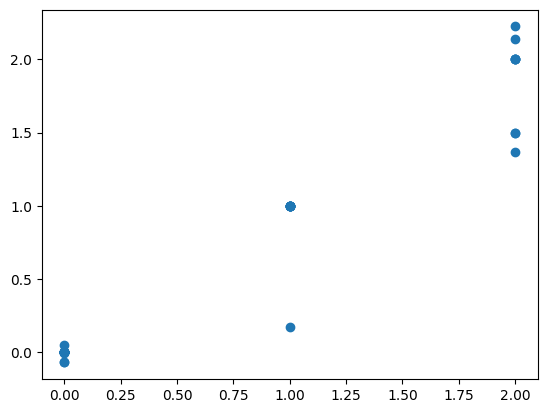

In [72]:
plt.scatter(Y_test,test_prediction)
plt.xlabel = 'Actual price'
plt.ylabel = 'Predicted Price'
plt.title = 'Precicted_price vs Actual Price'
plt.show()